In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd

file_path = '/content/drive/MyDrive/CALIDAD_DEL_AIRE_EN_COLOMBIA__PROMEDIO_ANUAL__20250121.csv'  # Ajusta la ruta si está en otra carpeta
df = pd.read_csv(file_path)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID Estacion                           13940 non-null  int64  
 1   Autoridad Ambiental                   13940 non-null  object 
 2   Estación                              13940 non-null  object 
 3   Latitud                               13940 non-null  float64
 4   Longitud                              13940 non-null  float64
 5   Variable                              13940 non-null  object 
 6   Unidades                              13940 non-null  object 
 7   Tiempo de exposición (horas)          13940 non-null  int64  
 8   Año                                   13940 non-null  int64  
 9   Promedio                              13940 non-null  float64
 10  Suma                                  13940 non-null  float64
 11  No. de datos   

In [50]:
df.head()

,ID Estacion,Autoridad Ambiental,Estación,Latitud,Longitud,Variable,Unidades,Tiempo de exposición (horas),Año,Promedio,...,Fechas/horas del máximo,Mínimo,Fechas/horas del mínimo,Días de excedencias,Código del Departamento,Nombre del Departamento,Código del Municipio,Nombre del Municipio,Tipo de Estación,Ubicacion
0,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,1,2011,256.8,...,29/11/2011 1:00,1.3,29/11/2011 7:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
1,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,24,2011,257.4,...,16/11/2011 0:00,99.7,8/11/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
2,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,PLiquida,mm,1,2011,4.0,...,20/12/2011 2:00,1.5,07/11/2011 23:00:00 - 08/11/2011 05:00:00 - 13...,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
3,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,1,2011,645.9,...,12/09/2011 10:00,641.6,27/10/2011 17:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
4,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,24,2011,645.9,...,20/10/2011 0:00,644.0,27/10/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)


In [51]:
#
df["Tipo de Estación"].unique()

array(['Fija', 'Indicativa', nan], dtype=object)

In [52]:
df["Variable"].unique()

array(['DViento', 'PLiquida', 'P', 'PST', 'RGlobal', 'TAire2', 'VViento',
       'HAire', 'TAire', 'NO', 'PM10', 'HAire10', 'PM2.5', 'TAire10',
       'RUVb', 'NO2', 'SO2', 'O3', 'HAire2', 'CO'], dtype=object)

In [53]:
df["Unidades"].unique()

array(['deg', 'mm', 'mmHg', 'ugm3', 'Wm2', 'Celsius', 'ms', 'perc',
       'MEDh'], dtype=object)

In [54]:
# Limpieza de datos
dn=df.dropna()
dn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13864 entries, 0 to 13939
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID Estacion                           13864 non-null  int64  
 1   Autoridad Ambiental                   13864 non-null  object 
 2   Estación                              13864 non-null  object 
 3   Latitud                               13864 non-null  float64
 4   Longitud                              13864 non-null  float64
 5   Variable                              13864 non-null  object 
 6   Unidades                              13864 non-null  object 
 7   Tiempo de exposición (horas)          13864 non-null  int64  
 8   Año                                   13864 non-null  int64  
 9   Promedio                              13864 non-null  float64
 10  Suma                                  13864 non-null  float64
 11  No. de datos        

In [55]:
import pandas as pd

# Valores específicos en la columna 'Variable' para filtrar
valores_variable = ["PM10", "PM2.5", "PST", "P", "SO2_TR", "SO2", "Dióxido de Nitrógeno"]

# Filtrar el DataFrame por los valores específicos en la columna 'Variable'
df_filtrado = df[df["Variable"].isin(valores_variable)]

# Definir las columnas relevantes para analizar outliers
columnas_a_analizar = ["Promedio", "Porcentaje excedencias limite actual", "Días de excedencias"]

# Iterar sobre las columnas para calcular los outliers
for columna in columnas_a_analizar:
    # Calcular Q1 (percentil 25) y Q3 (percentil 75)
    q1 = df_filtrado[columna].quantile(0.25)
    q3 = df_filtrado[columna].quantile(0.75)
    iqr = q3 - q1

    # Definir límites para detectar valores atípicos
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Filtrar los valores atípicos
    outliers = df_filtrado[(df_filtrado[columna] < limite_inferior) | (df_filtrado[columna] > limite_superior)]

    # Mostrar los resultados
    print(f"Valores atípicos en la columna '{columna}' para las Variables seleccionadas:")
    if outliers.empty:
        print("No se encontraron valores atípicos.")
    else:
        print(outliers[["ID Estacion", "Variable", "Nombre del Municipio", columna]])
    print("-" * 50)


Valores atípicos en la columna 'Promedio' para las Variables seleccionadas:
       ID Estacion Variable Nombre del Municipio  Promedio
3             9020        P            GIRARDOTA     645.9
4             9020        P            GIRARDOTA     645.9
29           29509        P             MEDELLÍN     639.1
30           29509        P             MEDELLÍN     639.0
31           29507        P             MEDELLÍN     639.4
...            ...      ...                  ...       ...
13769         8216        P         BOGOTA, D.C.     562.7
13805         8219        P         BOGOTA, D.C.     563.1
13806         8219        P         BOGOTA, D.C.     563.1
13829        31841        P         BOGOTA, D.C.     561.7
13830        31841        P         BOGOTA, D.C.     561.7

[725 rows x 4 columns]
--------------------------------------------------
Valores atípicos en la columna 'Porcentaje excedencias limite actual' para las Variables seleccionadas:
       ID Estacion Variable Nombre de

In [56]:
dn = dn.dropna(subset=["Tipo de Estación"])


In [57]:
dn["Tipo de Estación"].unique()

array(['Fija', 'Indicativa'], dtype=object)

In [58]:
df["Tipo de Estación"].unique()

array(['Fija', 'Indicativa', nan], dtype=object)

In [59]:
#Dummies / One-Hot Encoding
dummies_estacion = pd.get_dummies(dn["Tipo de Estación"], dtype=int)
dn = dn.join(dummies_estacion)# cargar los datos al df
dn.head()

,ID Estacion,Autoridad Ambiental,Estación,Latitud,Longitud,Variable,Unidades,Tiempo de exposición (horas),Año,Promedio,...,Fechas/horas del mínimo,Días de excedencias,Código del Departamento,Nombre del Departamento,Código del Municipio,Nombre del Municipio,Tipo de Estación,Ubicacion,Fija,Indicativa
0,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,1,2011,256.8,...,29/11/2011 7:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
1,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,24,2011,257.4,...,8/11/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
2,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,PLiquida,mm,1,2011,4.0,...,07/11/2011 23:00:00 - 08/11/2011 05:00:00 - 13...,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
3,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,1,2011,645.9,...,27/10/2011 17:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
4,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,24,2011,645.9,...,27/10/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0


In [60]:
#Dummies / One-Hot Encoding
dummies_estacion = pd.get_dummies(dn["Estación"], dtype=int)
dummies_estacion

,ACOPI,ACUALAGO,AEROPUERTO,ALBANIA_CG,ALC,ALCALDIA,ALCALDÍA,ALCALDÍA DE GUARNE,ALCALDÍA DE GUARNE 2022,ALCATRACES,...,YOPAL-ITEY,ZM07 PLAN BONITO,ZM11 MINGUILLO,ZM14 ESTADOS UNIDOS,ZM17 EL PRADO,ZM18 MÓVIL 1 NORCARBÓN,ZONA FRANCA,ZONA FRANCA LA CANDELARIA,ZUANA,ÉXITO SAN ANTONIO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# revision de datos
dn['Estación'].value_counts()

,count
Estación,
KENNEDY,259
C. ALTO RENDIMIENTO,258
TUNAL,245
LAS FERIAS,237
CARVAJAL - SEVILLANA,235
...,...
BEL-JEGA,1
CAMPAÑA CHINCHINÁ,1
C. DE COMERCIO,1


In [62]:
dn = dn.drop("Estación", axis=1)
dn.head()

,ID Estacion,Autoridad Ambiental,Latitud,Longitud,Variable,Unidades,Tiempo de exposición (horas),Año,Promedio,Suma,...,Fechas/horas del mínimo,Días de excedencias,Código del Departamento,Nombre del Departamento,Código del Municipio,Nombre del Municipio,Tipo de Estación,Ubicacion,Fija,Indicativa
0,9020,AMVA,6.378517,-75.443986,DViento,deg,1,2011,256.8,3.216375e+05,...,29/11/2011 7:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
1,9020,AMVA,6.378517,-75.443986,DViento,deg,24,2011,257.4,1.498401e+04,...,8/11/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
2,9020,AMVA,6.378517,-75.443986,PLiquida,mm,1,2011,4.0,2.935000e+02,...,07/11/2011 23:00:00 - 08/11/2011 05:00:00 - 13...,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
3,9020,AMVA,6.378517,-75.443986,P,mmHg,1,2011,645.9,2.917014e+06,...,27/10/2011 17:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
4,9020,AMVA,6.378517,-75.443986,P,mmHg,24,2011,645.9,1.214347e+05,...,27/10/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0


In [63]:
dn = dn.drop("Autoridad Ambiental", axis=1)
dn.head()

,ID Estacion,Latitud,Longitud,Variable,Unidades,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,...,Fechas/horas del mínimo,Días de excedencias,Código del Departamento,Nombre del Departamento,Código del Municipio,Nombre del Municipio,Tipo de Estación,Ubicacion,Fija,Indicativa
0,9020,6.378517,-75.443986,DViento,deg,1,2011,256.8,3.216375e+05,1411,...,29/11/2011 7:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
1,9020,6.378517,-75.443986,DViento,deg,24,2011,257.4,1.498401e+04,59,...,8/11/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
2,9020,6.378517,-75.443986,PLiquida,mm,1,2011,4.0,2.935000e+02,74,...,07/11/2011 23:00:00 - 08/11/2011 05:00:00 - 13...,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
3,9020,6.378517,-75.443986,P,mmHg,1,2011,645.9,2.917014e+06,4516,...,27/10/2011 17:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0
4,9020,6.378517,-75.443986,P,mmHg,24,2011,645.9,1.214347e+05,188,...,27/10/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517),1,0


In [64]:
import pandas as pd

# Filtrar solo las variables que nos interesan
filtros = ["PM10", "PM2.5", "SO2", "Dióxido de Nitrógeno", "O3", "PM10", "PM2.5"]
datos_filtrados = dn[dn["Variable"].isin(filtros)]

# Crear las columnas dummies
dummies_variable = pd.get_dummies(datos_filtrados["Variable"], dtype=int)
datos_filtrados = datos_filtrados.join(dummies_variable)

# Si deseas sobrescribir datosn con los datos filtrados
dn = datos_filtrados

print(dn)

       ID Estacion   Latitud   Longitud Variable Unidades  \
44            9049  9.940778 -73.500592     PM10     ugm3   
147           8902  2.962503 -75.284029    PM2.5     ugm3   
202          30423  6.316667 -75.538333     PM10     ugm3   
219          28202  4.572650 -74.083800      SO2     ugm3   
220          28202  4.572650 -74.083800      SO2     ugm3   
...            ...       ...        ...      ...      ...   
13927        31530  8.726222 -75.889611       O3     ugm3   
13928        26288  8.804472 -75.850561       O3     ugm3   
13929        31389  4.108056 -73.655833       O3     ugm3   
13932        31960  8.762074 -75.886905       O3     ugm3   
13933        29962  8.749361 -75.867861       O3     ugm3   

       Tiempo de exposición (horas)   Año  Promedio          Suma  \
44                               24  2011     17.50    1138.19000   
147                              24  2011      8.10     298.32000   
202                              24  2011     17.80      89.

In [65]:
#Dummies / One-Hot Encoding
dummies_variable = pd.get_dummies(dn["Variable"], dtype=int)
dummies_variable

,O3,PM10,PM2.5,SO2
44,0,1,0,0
147,0,0,1,0
202,0,1,0,0
219,0,0,0,1
220,0,0,0,1
...,...,...,...,...
13927,1,0,0,0
13928,1,0,0,0
13929,1,0,0,0
13932,1,0,0,0


In [66]:
# revision de datos
dn['Variable'].value_counts()

,count
Variable,
PM10,2390
PM2.5,1437
SO2,816
O3,713


In [67]:
dn = dn.drop("Variable", axis=1)
dn.head()

,ID Estacion,Latitud,Longitud,Unidades,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,Representatividad Temporal,...,Código del Municipio,Nombre del Municipio,Tipo de Estación,Ubicacion,Fija,Indicativa,O3,PM10,PM2.5,SO2
44,9049,9.940778,-73.500592,ugm3,24,2011,17.5,1138.19000,65,53.0,...,20621.0,LA PAZ,Fija,POINT (-73.500592 9.940778),1,0,0,1,0,0
147,8902,2.962503,-75.284029,ugm3,24,2011,8.1,298.32000,37,20.0,...,41001.0,NEIVA,Fija,POINT (-75.284029 2.962503),1,0,0,0,1,0
202,30423,6.316667,-75.538333,ugm3,24,2011,17.8,89.14000,5,4.0,...,5088.0,BELLO,Indicativa,POINT (-75.538333 6.316667),0,1,0,1,0,0
219,28202,4.572650,-74.083800,ugm3,3,2011,2.4,14348.50000,6047,69.0,...,11001.0,"BOGOTÁ, D.C.",Fija,POINT (-74.0838 4.57265),1,0,0,0,0,1
220,28202,4.572650,-74.083800,ugm3,1,2011,2.4,14700.78809,6194,71.0,...,11001.0,"BOGOTÁ, D.C.",Fija,POINT (-74.0838 4.57265),1,0,0,0,0,1


In [68]:
#Dummies / One-Hot Encoding
dummies_unidades = pd.get_dummies(dn["Unidades"], dtype=int)
datosn = dn.join(dummies_unidades)# cargar los datos al df
datosn.head()

,ID Estacion,Latitud,Longitud,Unidades,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,Representatividad Temporal,...,Nombre del Municipio,Tipo de Estación,Ubicacion,Fija,Indicativa,O3,PM10,PM2.5,SO2,ugm3
44,9049,9.940778,-73.500592,ugm3,24,2011,17.5,1138.19000,65,53.0,...,LA PAZ,Fija,POINT (-73.500592 9.940778),1,0,0,1,0,0,1
147,8902,2.962503,-75.284029,ugm3,24,2011,8.1,298.32000,37,20.0,...,NEIVA,Fija,POINT (-75.284029 2.962503),1,0,0,0,1,0,1
202,30423,6.316667,-75.538333,ugm3,24,2011,17.8,89.14000,5,4.0,...,BELLO,Indicativa,POINT (-75.538333 6.316667),0,1,0,1,0,0,1
219,28202,4.572650,-74.083800,ugm3,3,2011,2.4,14348.50000,6047,69.0,...,"BOGOTÁ, D.C.",Fija,POINT (-74.0838 4.57265),1,0,0,0,0,1,1
220,28202,4.572650,-74.083800,ugm3,1,2011,2.4,14700.78809,6194,71.0,...,"BOGOTÁ, D.C.",Fija,POINT (-74.0838 4.57265),1,0,0,0,0,1,1


In [69]:
#Dummies / One-Hot Encoding
dummies_unidades = pd.get_dummies(dn["Unidades"], dtype=int)
dummies_unidades

,ugm3
44,1
147,1
202,1
219,1
220,1
...,...
13927,1
13928,1
13929,1
13932,1


In [70]:
# revision de datos
dn['Unidades'].value_counts()

,count
Unidades,
ugm3,5356


In [71]:
dn = dn.drop("Unidades", axis=1)
dn.head()

,ID Estacion,Latitud,Longitud,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,Representatividad Temporal,Excedencias limite actual,...,Código del Municipio,Nombre del Municipio,Tipo de Estación,Ubicacion,Fija,Indicativa,O3,PM10,PM2.5,SO2
44,9049,9.940778,-73.500592,24,2011,17.5,1138.19000,65,53.0,0,...,20621.0,LA PAZ,Fija,POINT (-73.500592 9.940778),1,0,0,1,0,0
147,8902,2.962503,-75.284029,24,2011,8.1,298.32000,37,20.0,0,...,41001.0,NEIVA,Fija,POINT (-75.284029 2.962503),1,0,0,0,1,0
202,30423,6.316667,-75.538333,24,2011,17.8,89.14000,5,4.0,0,...,5088.0,BELLO,Indicativa,POINT (-75.538333 6.316667),0,1,0,1,0,0
219,28202,4.572650,-74.083800,3,2011,2.4,14348.50000,6047,69.0,0,...,11001.0,"BOGOTÁ, D.C.",Fija,POINT (-74.0838 4.57265),1,0,0,0,0,1
220,28202,4.572650,-74.083800,1,2011,2.4,14700.78809,6194,71.0,0,...,11001.0,"BOGOTÁ, D.C.",Fija,POINT (-74.0838 4.57265),1,0,0,0,0,1


In [72]:
dn = dn.drop("Nombre del Departamento", axis=1)
dn.head()

,ID Estacion,Latitud,Longitud,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,Representatividad Temporal,Excedencias limite actual,...,Código del Municipio,Nombre del Municipio,Tipo de Estación,Ubicacion,Fija,Indicativa,O3,PM10,PM2.5,SO2
44,9049,9.940778,-73.500592,24,2011,17.5,1138.19000,65,53.0,0,...,20621.0,LA PAZ,Fija,POINT (-73.500592 9.940778),1,0,0,1,0,0
147,8902,2.962503,-75.284029,24,2011,8.1,298.32000,37,20.0,0,...,41001.0,NEIVA,Fija,POINT (-75.284029 2.962503),1,0,0,0,1,0
202,30423,6.316667,-75.538333,24,2011,17.8,89.14000,5,4.0,0,...,5088.0,BELLO,Indicativa,POINT (-75.538333 6.316667),0,1,0,1,0,0
219,28202,4.572650,-74.083800,3,2011,2.4,14348.50000,6047,69.0,0,...,11001.0,"BOGOTÁ, D.C.",Fija,POINT (-74.0838 4.57265),1,0,0,0,0,1
220,28202,4.572650,-74.083800,1,2011,2.4,14700.78809,6194,71.0,0,...,11001.0,"BOGOTÁ, D.C.",Fija,POINT (-74.0838 4.57265),1,0,0,0,0,1


In [73]:
dn = dn.drop("Nombre del Municipio", axis=1)
dn.head()

,ID Estacion,Latitud,Longitud,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,Representatividad Temporal,Excedencias limite actual,...,Código del Departamento,Código del Municipio,Tipo de Estación,Ubicacion,Fija,Indicativa,O3,PM10,PM2.5,SO2
44,9049,9.940778,-73.500592,24,2011,17.5,1138.19000,65,53.0,0,...,20,20621.0,Fija,POINT (-73.500592 9.940778),1,0,0,1,0,0
147,8902,2.962503,-75.284029,24,2011,8.1,298.32000,37,20.0,0,...,41,41001.0,Fija,POINT (-75.284029 2.962503),1,0,0,0,1,0
202,30423,6.316667,-75.538333,24,2011,17.8,89.14000,5,4.0,0,...,5,5088.0,Indicativa,POINT (-75.538333 6.316667),0,1,0,1,0,0
219,28202,4.572650,-74.083800,3,2011,2.4,14348.50000,6047,69.0,0,...,11,11001.0,Fija,POINT (-74.0838 4.57265),1,0,0,0,0,1
220,28202,4.572650,-74.083800,1,2011,2.4,14700.78809,6194,71.0,0,...,11,11001.0,Fija,POINT (-74.0838 4.57265),1,0,0,0,0,1


In [74]:
dn = dn.drop("Tipo de Estación", axis=1)
dn.head()

,ID Estacion,Latitud,Longitud,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,Representatividad Temporal,Excedencias limite actual,...,Días de excedencias,Código del Departamento,Código del Municipio,Ubicacion,Fija,Indicativa,O3,PM10,PM2.5,SO2
44,9049,9.940778,-73.500592,24,2011,17.5,1138.19000,65,53.0,0,...,0,20,20621.0,POINT (-73.500592 9.940778),1,0,0,1,0,0
147,8902,2.962503,-75.284029,24,2011,8.1,298.32000,37,20.0,0,...,0,41,41001.0,POINT (-75.284029 2.962503),1,0,0,0,1,0
202,30423,6.316667,-75.538333,24,2011,17.8,89.14000,5,4.0,0,...,0,5,5088.0,POINT (-75.538333 6.316667),0,1,0,1,0,0
219,28202,4.572650,-74.083800,3,2011,2.4,14348.50000,6047,69.0,0,...,0,11,11001.0,POINT (-74.0838 4.57265),1,0,0,0,0,1
220,28202,4.572650,-74.083800,1,2011,2.4,14700.78809,6194,71.0,0,...,0,11,11001.0,POINT (-74.0838 4.57265),1,0,0,0,0,1


In [75]:
dn = dn.drop("Ubicacion", axis=1)
dn.head()

,ID Estacion,Latitud,Longitud,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,Representatividad Temporal,Excedencias limite actual,...,Fechas/horas del mínimo,Días de excedencias,Código del Departamento,Código del Municipio,Fija,Indicativa,O3,PM10,PM2.5,SO2
44,9049,9.940778,-73.500592,24,2011,17.5,1138.19000,65,53.0,0,...,3/12/2011,0,20,20621.0,1,0,0,1,0,0
147,8902,2.962503,-75.284029,24,2011,8.1,298.32000,37,20.0,0,...,2/12/2011,0,41,41001.0,1,0,0,0,1,0
202,30423,6.316667,-75.538333,24,2011,17.8,89.14000,5,4.0,0,...,27/12/2011,0,5,5088.0,0,1,0,1,0,0
219,28202,4.572650,-74.083800,3,2011,2.4,14348.50000,6047,69.0,0,...,20/01/2011 04:00:00 - 20/01/2011 05:00:00 - 20...,0,11,11001.0,1,0,0,0,0,1
220,28202,4.572650,-74.083800,1,2011,2.4,14700.78809,6194,71.0,0,...,21/01/2011 08:00:00 - 07/06/2011 01:00:00 - 29...,0,11,11001.0,1,0,0,0,0,1


In [76]:
dn["Fija"].unique()

array([1, 0])

In [77]:
dn["Indicativa"].unique()

array([0, 1])

In [78]:
df["Variable"].unique()

array(['DViento', 'PLiquida', 'P', 'PST', 'RGlobal', 'TAire2', 'VViento',
       'HAire', 'TAire', 'NO', 'PM10', 'HAire10', 'PM2.5', 'TAire10',
       'RUVb', 'NO2', 'SO2', 'O3', 'HAire2', 'CO'], dtype=object)

In [79]:
dn["Tiempo de exposición (horas)"].unique()

array([24,  3,  1,  8])

In [80]:
dn = dn.drop("Fechas/horas del mínimo", axis=1)
dn.head()

,ID Estacion,Latitud,Longitud,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,Representatividad Temporal,Excedencias limite actual,...,Mínimo,Días de excedencias,Código del Departamento,Código del Municipio,Fija,Indicativa,O3,PM10,PM2.5,SO2
44,9049,9.940778,-73.500592,24,2011,17.5,1138.19000,65,53.0,0,...,3.0,0,20,20621.0,1,0,0,1,0,0
147,8902,2.962503,-75.284029,24,2011,8.1,298.32000,37,20.0,0,...,1.7,0,41,41001.0,1,0,0,0,1,0
202,30423,6.316667,-75.538333,24,2011,17.8,89.14000,5,4.0,0,...,7.4,0,5,5088.0,0,1,0,1,0,0
219,28202,4.572650,-74.083800,3,2011,2.4,14348.50000,6047,69.0,0,...,0.3,0,11,11001.0,1,0,0,0,0,1
220,28202,4.572650,-74.083800,1,2011,2.4,14700.78809,6194,71.0,0,...,0.3,0,11,11001.0,1,0,0,0,0,1


In [81]:
print(dn.columns)

Index(['ID Estacion', 'Latitud', 'Longitud', 'Tiempo de exposición (horas)',
       'Año', 'Promedio', 'Suma', 'No. de datos', 'Representatividad Temporal',
       'Excedencias limite actual', 'Porcentaje excedencias limite actual',
       'Mediana', 'Percentil 98', 'Máximo', 'Fechas/horas del máximo',
       'Mínimo', 'Días de excedencias', 'Código del Departamento',
       'Código del Municipio', 'Fija', 'Indicativa', 'O3', 'PM10', 'PM2.5',
       'SO2'],
      dtype='object')


In [82]:
dn = dn.drop("Fechas/horas del máximo", axis=1)
dn.head()

,ID Estacion,Latitud,Longitud,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,Representatividad Temporal,Excedencias limite actual,...,Mínimo,Días de excedencias,Código del Departamento,Código del Municipio,Fija,Indicativa,O3,PM10,PM2.5,SO2
44,9049,9.940778,-73.500592,24,2011,17.5,1138.19000,65,53.0,0,...,3.0,0,20,20621.0,1,0,0,1,0,0
147,8902,2.962503,-75.284029,24,2011,8.1,298.32000,37,20.0,0,...,1.7,0,41,41001.0,1,0,0,0,1,0
202,30423,6.316667,-75.538333,24,2011,17.8,89.14000,5,4.0,0,...,7.4,0,5,5088.0,0,1,0,1,0,0
219,28202,4.572650,-74.083800,3,2011,2.4,14348.50000,6047,69.0,0,...,0.3,0,11,11001.0,1,0,0,0,0,1
220,28202,4.572650,-74.083800,1,2011,2.4,14700.78809,6194,71.0,0,...,0.3,0,11,11001.0,1,0,0,0,0,1


In [83]:
print(dn.columns)

Index(['ID Estacion', 'Latitud', 'Longitud', 'Tiempo de exposición (horas)',
       'Año', 'Promedio', 'Suma', 'No. de datos', 'Representatividad Temporal',
       'Excedencias limite actual', 'Porcentaje excedencias limite actual',
       'Mediana', 'Percentil 98', 'Máximo', 'Mínimo', 'Días de excedencias',
       'Código del Departamento', 'Código del Municipio', 'Fija', 'Indicativa',
       'O3', 'PM10', 'PM2.5', 'SO2'],
      dtype='object')


<Axes: xlabel='Latitud', ylabel='Longitud'>

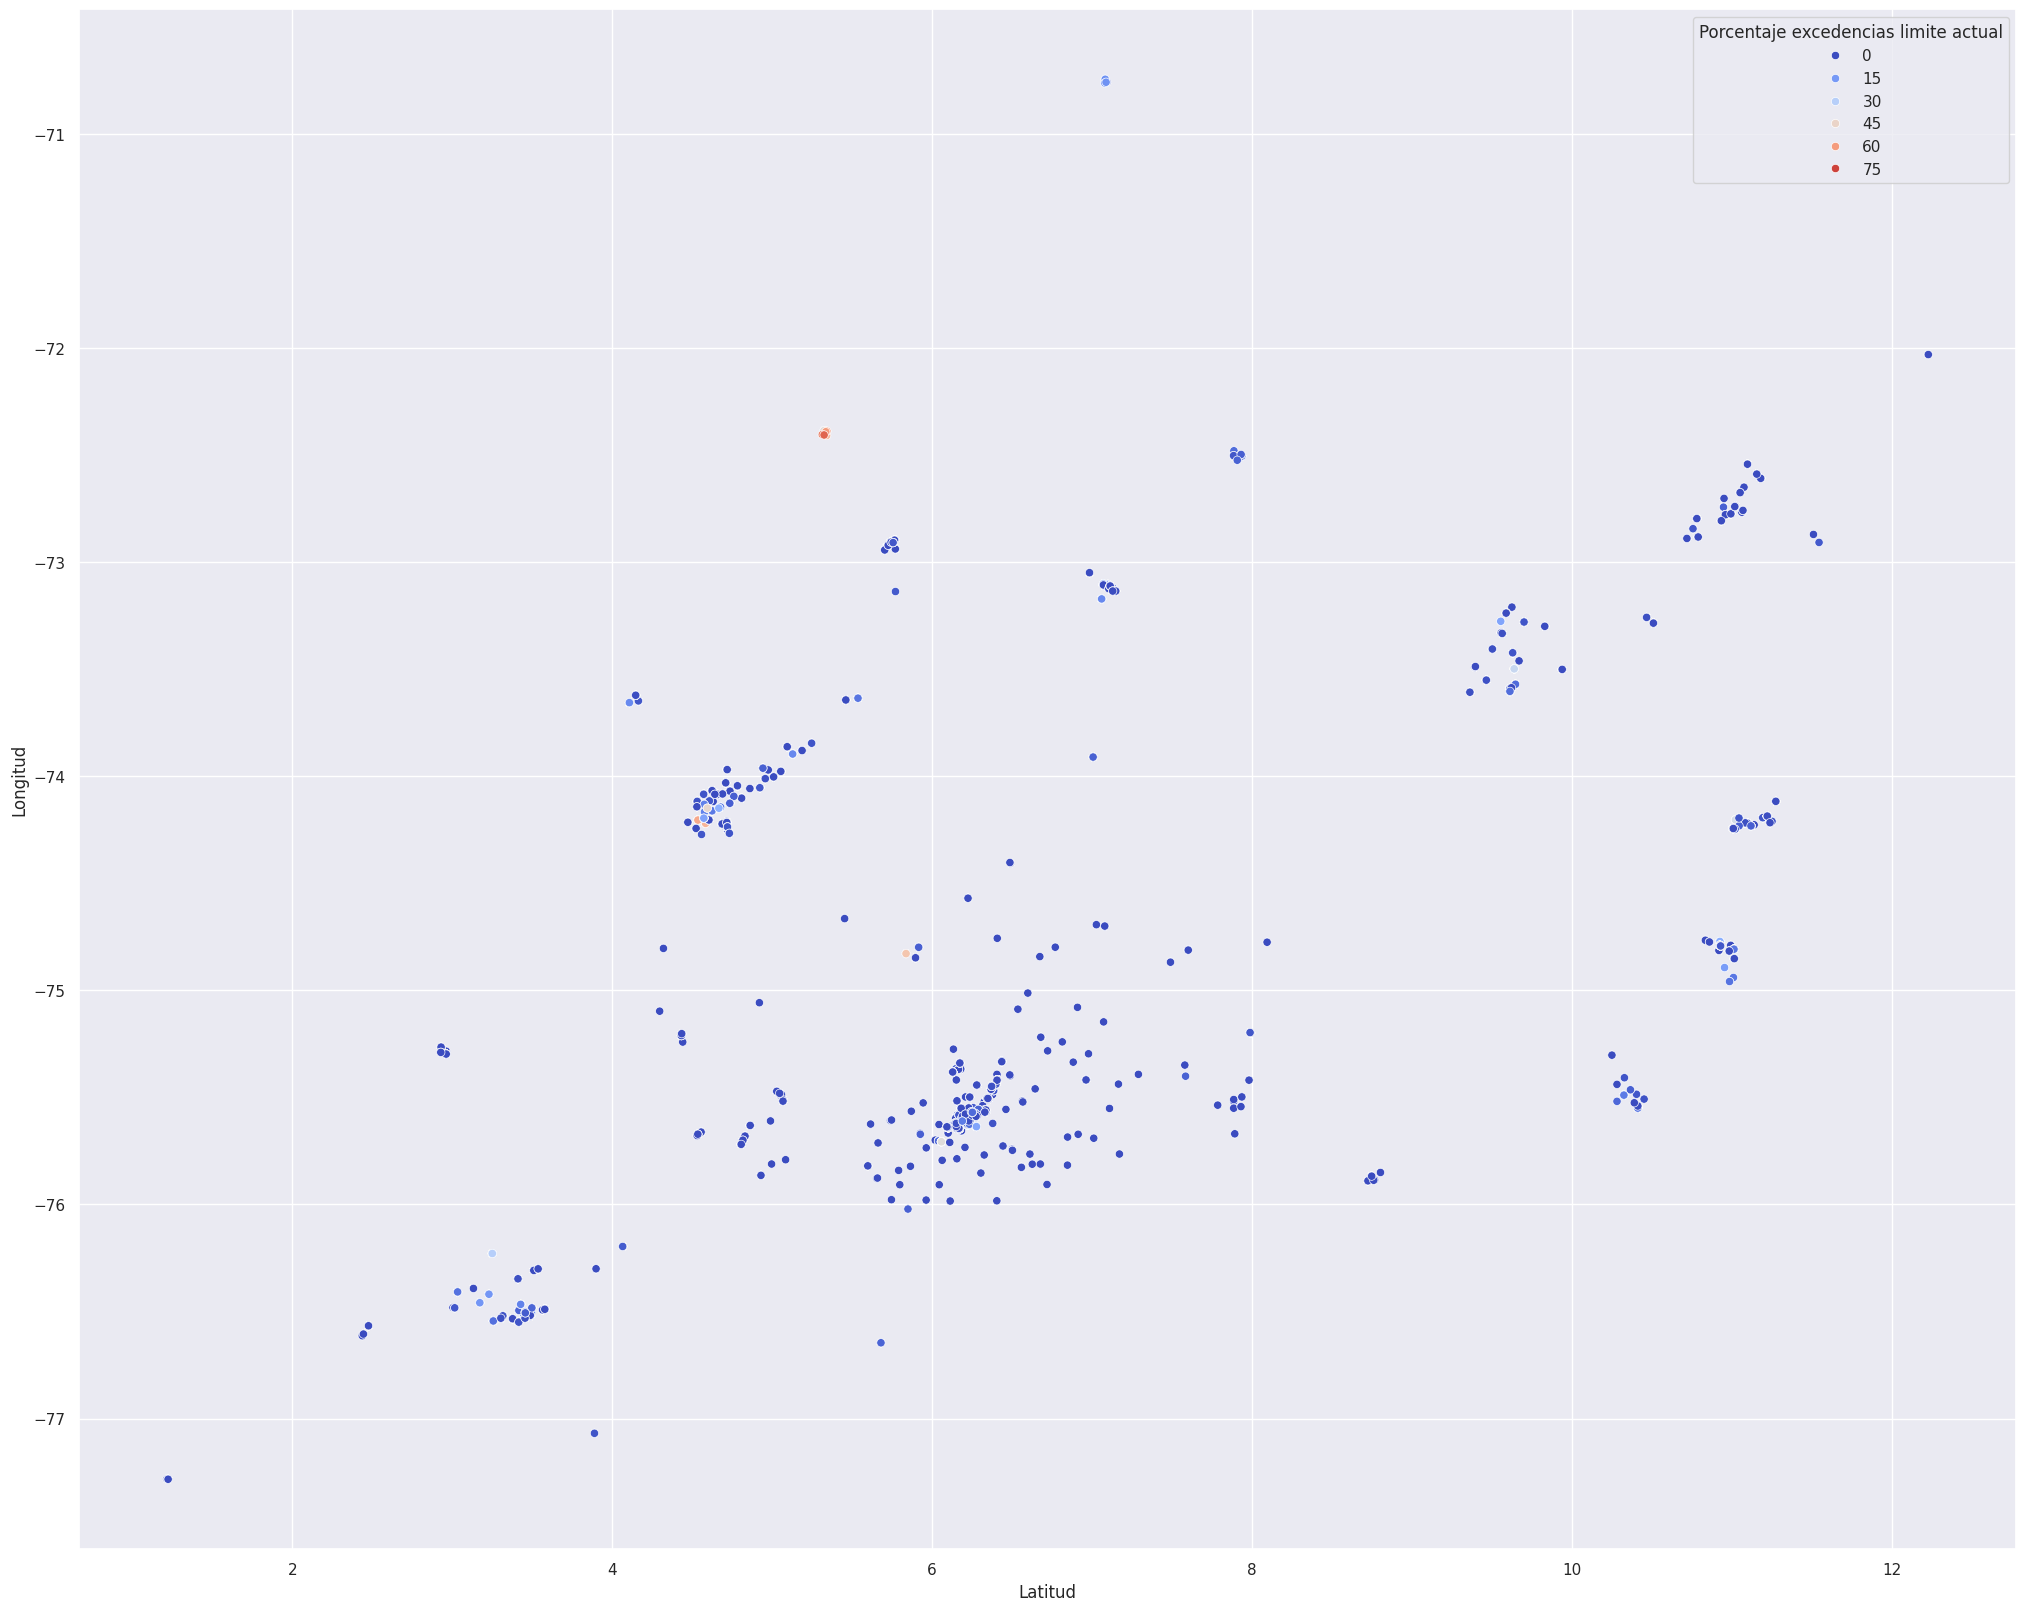

In [171]:
import seaborn as sb
sb.scatterplot(x="Latitud", y="Longitud", data=dn, hue="Porcentaje excedencias limite actual", palette="coolwarm" )

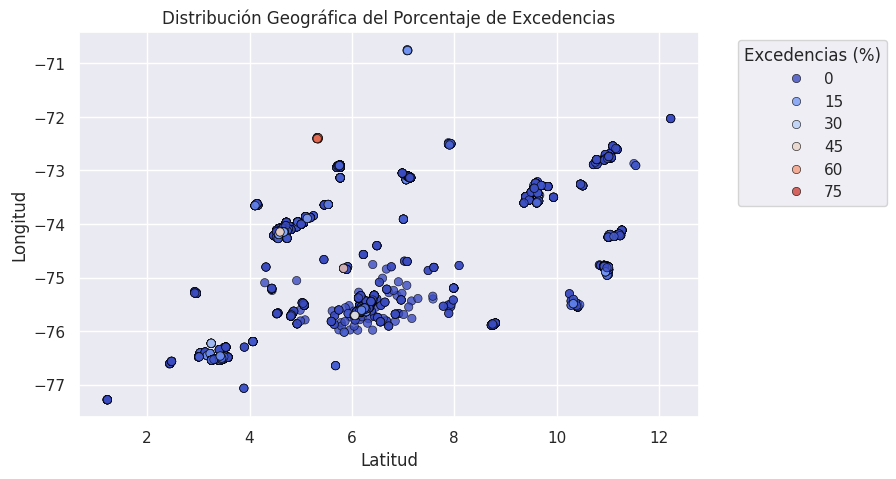

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura (ajustado para mejor visualización)
plt.figure(figsize=(8, 5))

# Crear gráfico de dispersión con color según el porcentaje de excedencias
sns.scatterplot(x="Latitud", y="Longitud", data=dn, hue="Porcentaje excedencias limite actual", palette="coolwarm", edgecolor="black", alpha=0.8)

# Personalizar la gráfica
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.title("Distribución Geográfica del Porcentaje de Excedencias")
plt.legend(title="Excedencias (%)", bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera del gráfico para mejor visualización
plt.grid(True)

# Mostrar la gráfica
plt.show()


array([[<Axes: title={'center': 'Latitud'}>,
        <Axes: title={'center': 'Longitud'}>,
        <Axes: title={'center': 'Tiempo de exposición (horas)'}>,
        <Axes: title={'center': 'Promedio'}>],
       [<Axes: title={'center': 'Suma'}>,
        <Axes: title={'center': 'Representatividad Temporal'}>,
        <Axes: title={'center': 'Excedencias limite actual'}>,
        <Axes: title={'center': 'Porcentaje excedencias limite actual'}>],
       [<Axes: title={'center': 'Mediana'}>,
        <Axes: title={'center': 'Percentil 98'}>,
        <Axes: title={'center': 'Máximo'}>,
        <Axes: title={'center': 'Mínimo'}>],
       [<Axes: title={'center': 'Días de excedencias'}>,
        <Axes: title={'center': 'Fija'}>,
        <Axes: title={'center': 'Indicativa'}>,
        <Axes: title={'center': 'O3'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'SO2'}>, <Axes: >]], dtype=object)

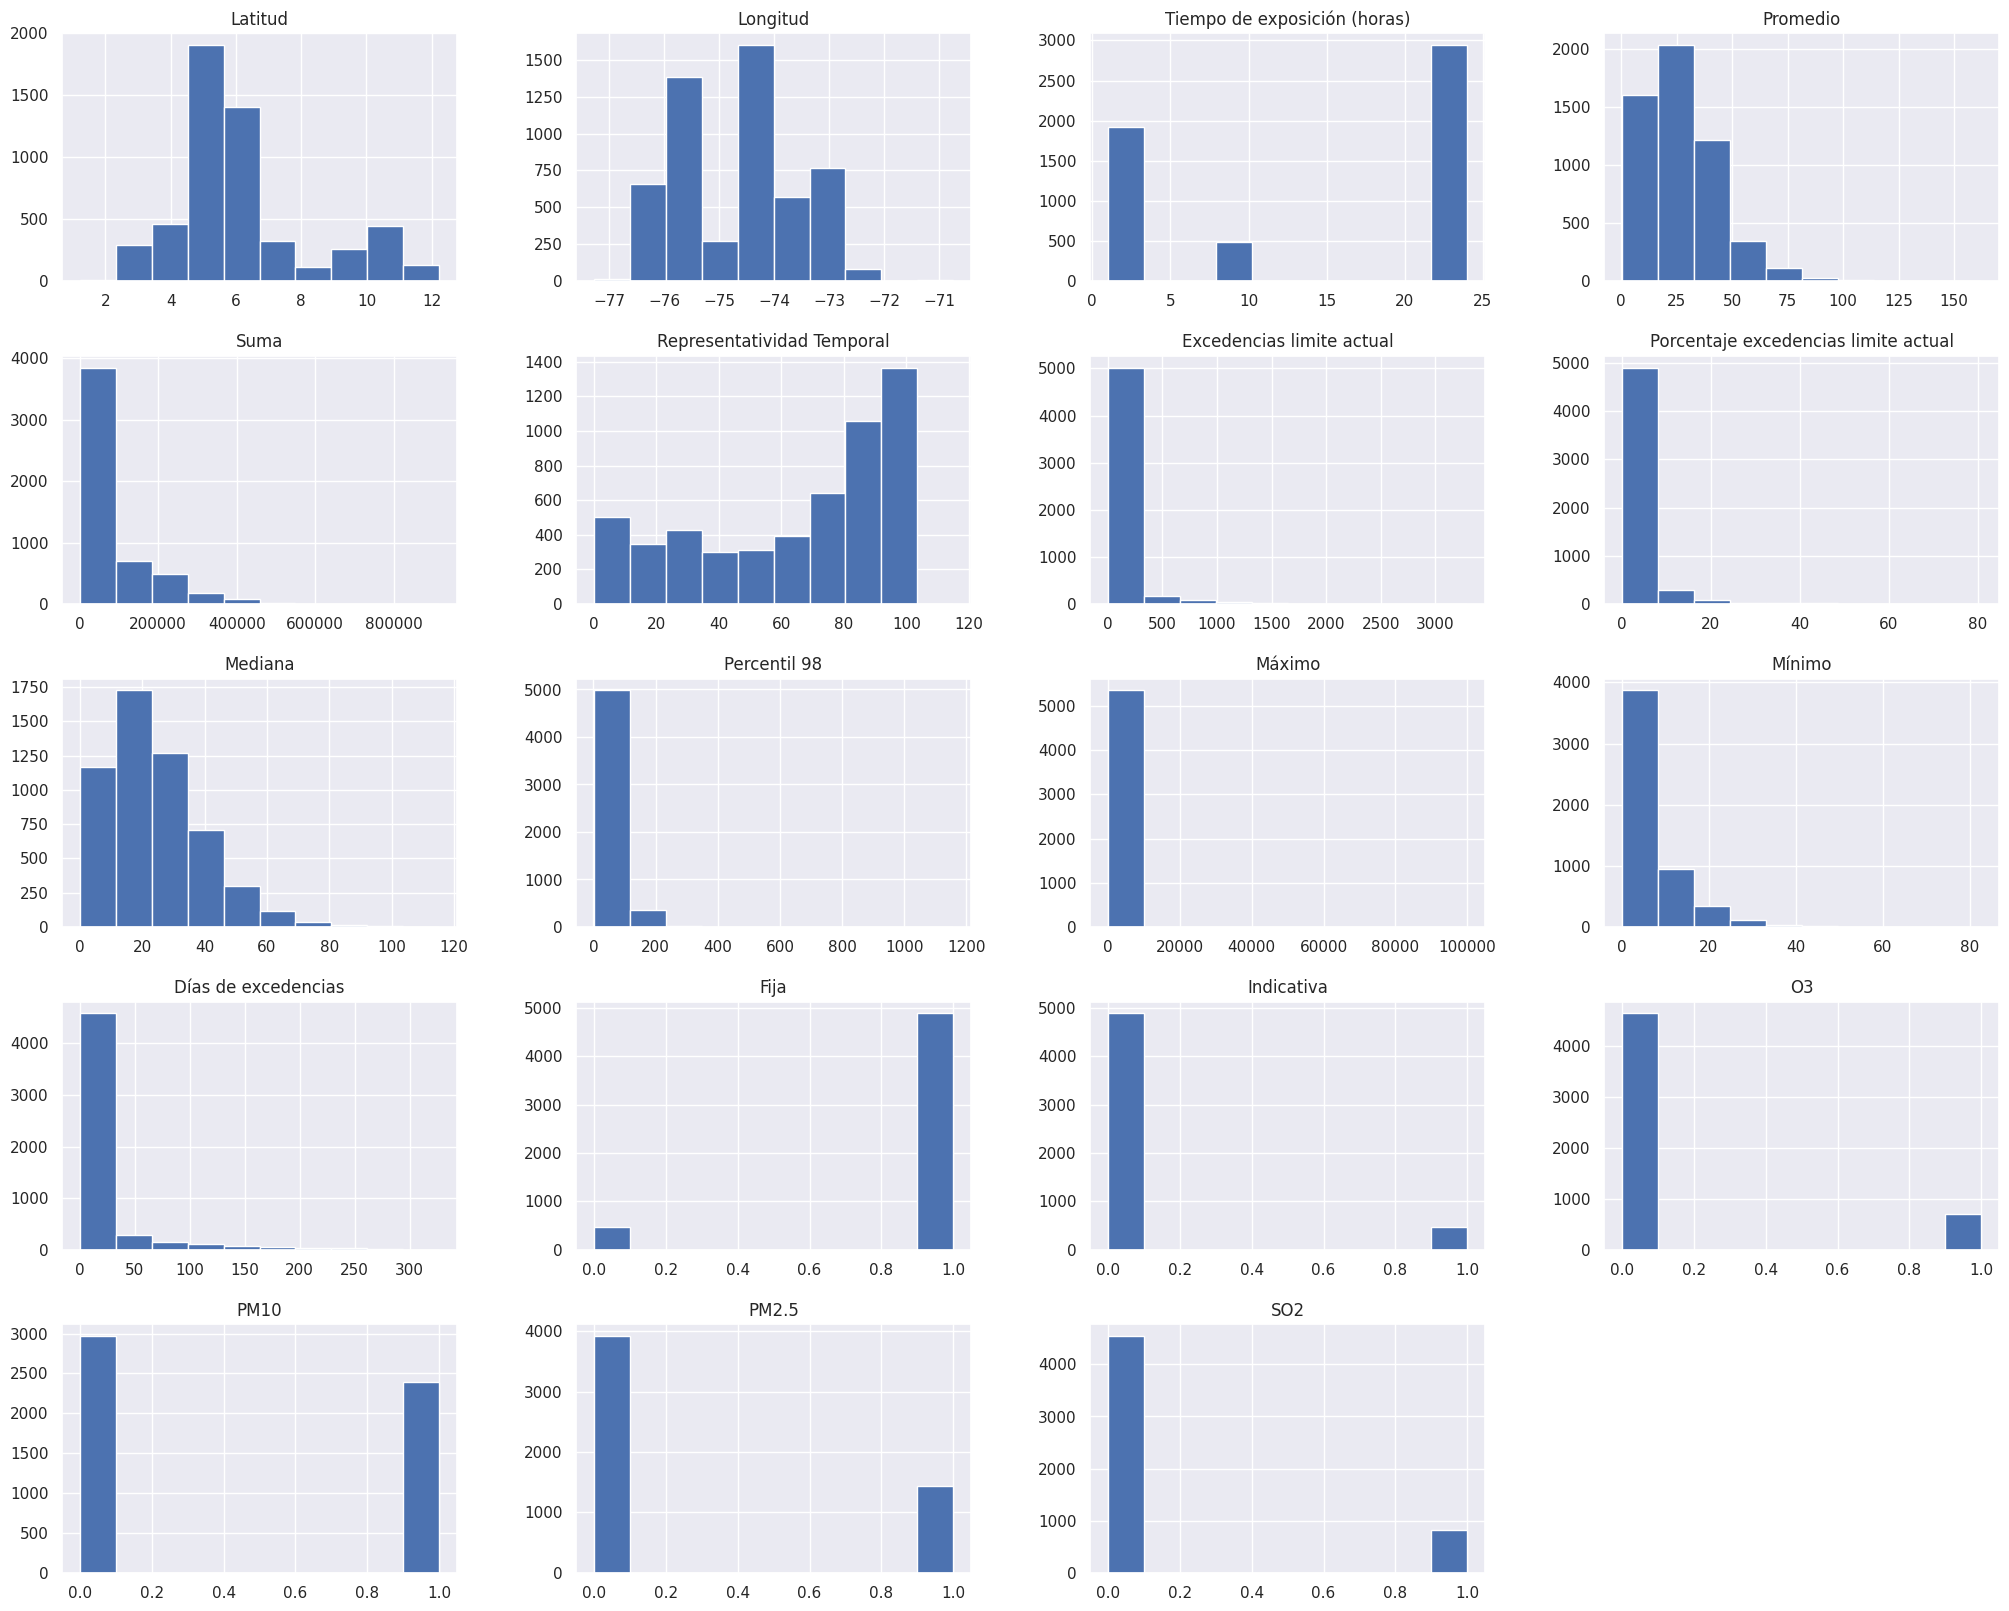

In [172]:
dn.hist()

In [85]:
dn = dn.drop(columns=["Código del Departamento"])

In [136]:
dn = dn.drop(columns=["No. de datos"])

In [86]:
dn = dn.drop(columns=["Código del Municipio"])

In [87]:
dn = dn.drop(columns=["ID Estacion"])

In [140]:
dn = dn.drop(columns=["Año"])

In [141]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5356 entries, 44 to 13933
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Latitud                               5356 non-null   float64
 1   Longitud                              5356 non-null   float64
 2   Tiempo de exposición (horas)          5356 non-null   int64  
 3   Promedio                              5356 non-null   float64
 4   Suma                                  5356 non-null   float64
 5   Representatividad Temporal            5356 non-null   float64
 6   Excedencias limite actual             5356 non-null   int64  
 7   Porcentaje excedencias limite actual  5356 non-null   float64
 8   Mediana                               5356 non-null   float64
 9   Percentil 98                          5356 non-null   float64
 10  Máximo                                5356 non-null   float64
 11  Mínimo              

In [142]:
import pandas as pd

# Resumen estadístico de todas las columnas numéricas
resumen = dn.describe()
print(resumen)

           Latitud     Longitud  Tiempo de exposición (horas)     Promedio  \
count  5356.000000  5356.000000                   5356.000000  5356.000000   
mean      6.054235   -74.619331                     14.329537    26.846970   
std       2.246170     1.140498                     10.859955    16.769845   
min       1.216489   -77.283628                      1.000000     0.300000   
25%       4.625377   -75.581111                      1.000000    14.800000   
50%       5.681111   -74.203056                     24.000000    24.550000   
75%       6.436000   -73.976986                     24.000000    36.300000   
max      12.230000   -70.743889                     24.000000   162.300000   

                Suma  Representatividad Temporal  Excedencias limite actual  \
count    5356.000000                 5356.000000                5356.000000   
mean    69305.939759                   64.432039                  66.071695   
std    106272.167733                   31.556273            

<ipython-input-168-777e5e58f5be>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y="Columna", x="Porcentaje", data=missing_df, palette="coolwarm")


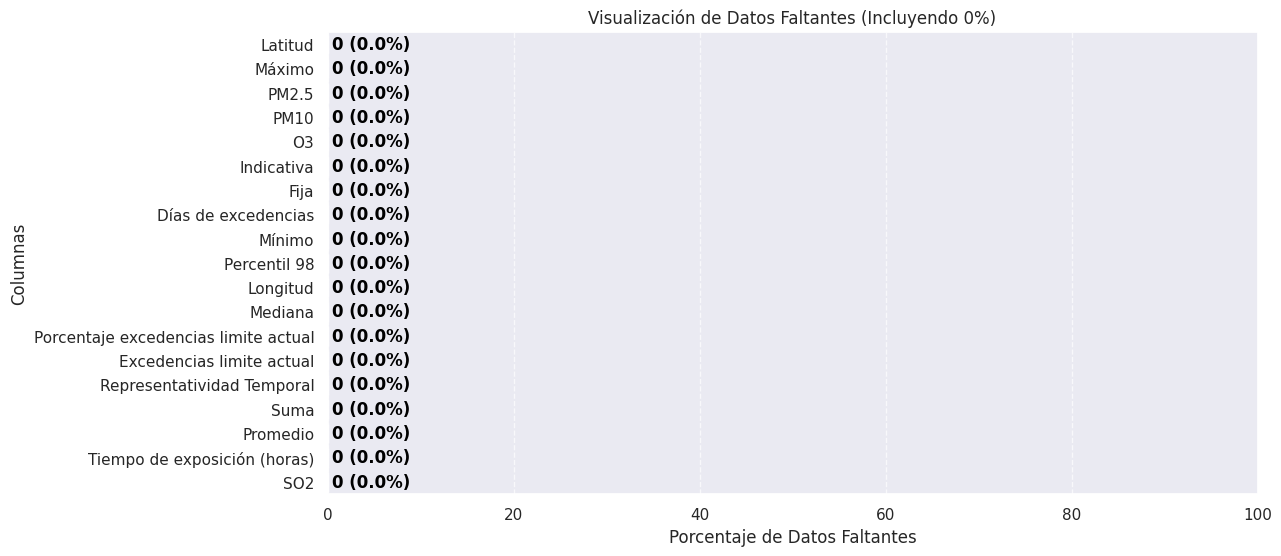

In [168]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular los valores faltantes
missing_values = dn.isnull().sum()
missing_percent = (missing_values / len(dn)) * 100

# Crear un DataFrame con todas las columnas, incluso las que tienen 0% de datos faltantes
missing_df = pd.DataFrame({'Columna': missing_values.index, 'Porcentaje': missing_percent.values, 'Faltantes': missing_values.values})

# Ordenar de mayor a menor (opcional)
missing_df = missing_df.sort_values(by="Porcentaje", ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(y="Columna", x="Porcentaje", data=missing_df, palette="coolwarm")

# Agregar etiquetas con el número de valores faltantes
for index, row in missing_df.iterrows():
    ax.text(row["Porcentaje"] + 0.5, index, f'{row["Faltantes"]} ({row["Porcentaje"]:.1f}%)',
            color='black', va="center", fontweight="bold")

# Personalización de la gráfica
plt.xlabel("Porcentaje de Datos Faltantes")
plt.ylabel("Columnas")
plt.title("Visualización de Datos Faltantes (Incluyendo 0%)")
plt.xlim(0, 100)  # Ajusta el eje X para que todas las barras sean visibles
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


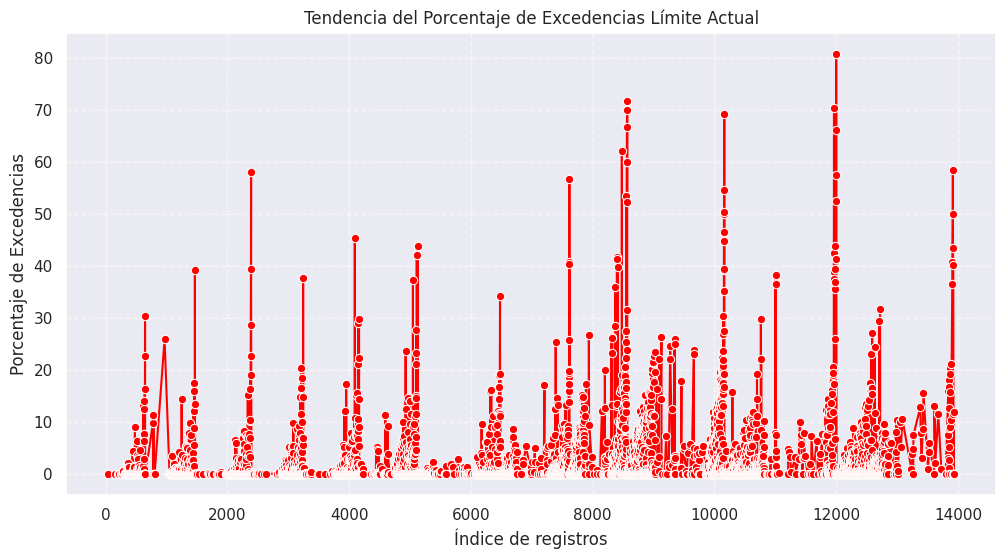

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'dn' ya está cargado y tiene la columna 'Porcentaje excedencias limite actual'
columna_excedencias = "Porcentaje excedencias limite actual"

# Ordenar por la variable de interés
dn_sorted = dn.sort_values(by=columna_excedencias, ascending=False)

# Configurar la figura
plt.figure(figsize=(12, 6))
sns.lineplot(data=dn_sorted, x=dn_sorted.index, y=columna_excedencias, marker="o", color="red")

# Personalización del gráfico
plt.xlabel("Índice de registros")
plt.ylabel("Porcentaje de Excedencias")
plt.title("Tendencia del Porcentaje de Excedencias Límite Actual")
plt.grid(True, linestyle="--", alpha=0.6)

# Mostrar la gráfica
plt.show()


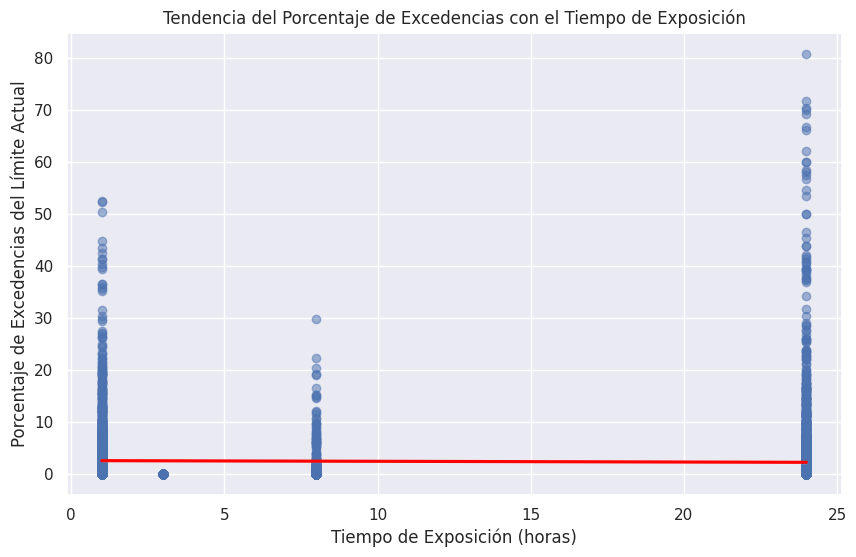

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear gráfico de dispersión con línea de tendencia
sns.regplot(data=dn, x="Tiempo de exposición (horas)", y="Porcentaje excedencias limite actual", scatter_kws={"alpha":0.5}, line_kws={"color": "red"})

# Personalizar la gráfica
plt.xlabel("Tiempo de Exposición (horas)")
plt.ylabel("Porcentaje de Excedencias del Límite Actual")
plt.title("Tendencia del Porcentaje de Excedencias con el Tiempo de Exposición")
plt.grid(True)

# Mostrar la gráfica
plt.show()


In [167]:
print(dn.isnull().sum())  # Muestra cuántos valores faltantes hay por columna
print(dn.isnull().sum().sum())  # Total de valores faltantes


Latitud                                 0
Longitud                                0
Tiempo de exposición (horas)            0
Promedio                                0
Suma                                    0
Representatividad Temporal              0
Excedencias limite actual               0
Porcentaje excedencias limite actual    0
Mediana                                 0
Percentil 98                            0
Máximo                                  0
Mínimo                                  0
Días de excedencias                     0
Fija                                    0
Indicativa                              0
O3                                      0
PM10                                    0
PM2.5                                   0
SO2                                     0
dtype: int64
0


In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular los valores faltantes
missing_values = dn.isnull().sum()
missing_percent = (missing_values / len(dn)) * 100

# Crear un DataFrame con los datos faltantes
missing_df = pd.DataFrame({'Columna': missing_values.index, 'Porcentaje': missing_percent.values, 'Faltantes': missing_values.values})

# Filtrar solo columnas con datos faltantes
missing_df = missing_df[missing_df["Faltantes"] > 0]

# Verificar si hay datos faltantes antes de graficar
if not missing_df.empty:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(y="Columna", x="Porcentaje", data=missing_df, palette="Reds_r")

    # Agregar etiquetas con el número de valores faltantes
    for index, row in missing_df.iterrows():
        ax.text(row["Porcentaje"] + 0.5, index, f'{row["Faltantes"]} ({row["Porcentaje"]:.1f}%)',
                color='black', va="center", fontweight="bold")

    # Personalización de la gráfica
    plt.xlabel("Porcentaje de Datos Faltantes")
    plt.ylabel("Características")
    plt.title("Visualización de Datos Faltantes")
    plt.xlim(0, 100)  # Ajustar el eje X
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.show()
else:
    print("✅ No hay valores faltantes en la base de datos.")


✅ No hay valores faltantes en la base de datos.


,Porcentaje excedencias limite actual
Porcentaje excedencias limite actual,1.000000
Días de excedencias,0.523043
Excedencias limite actual,0.500332
Promedio,0.433911
Percentil 98,0.425678
Mediana,0.383350
Año,0.136048
Mínimo,0.132098
Suma,0.114391
PM2.5,0.080318


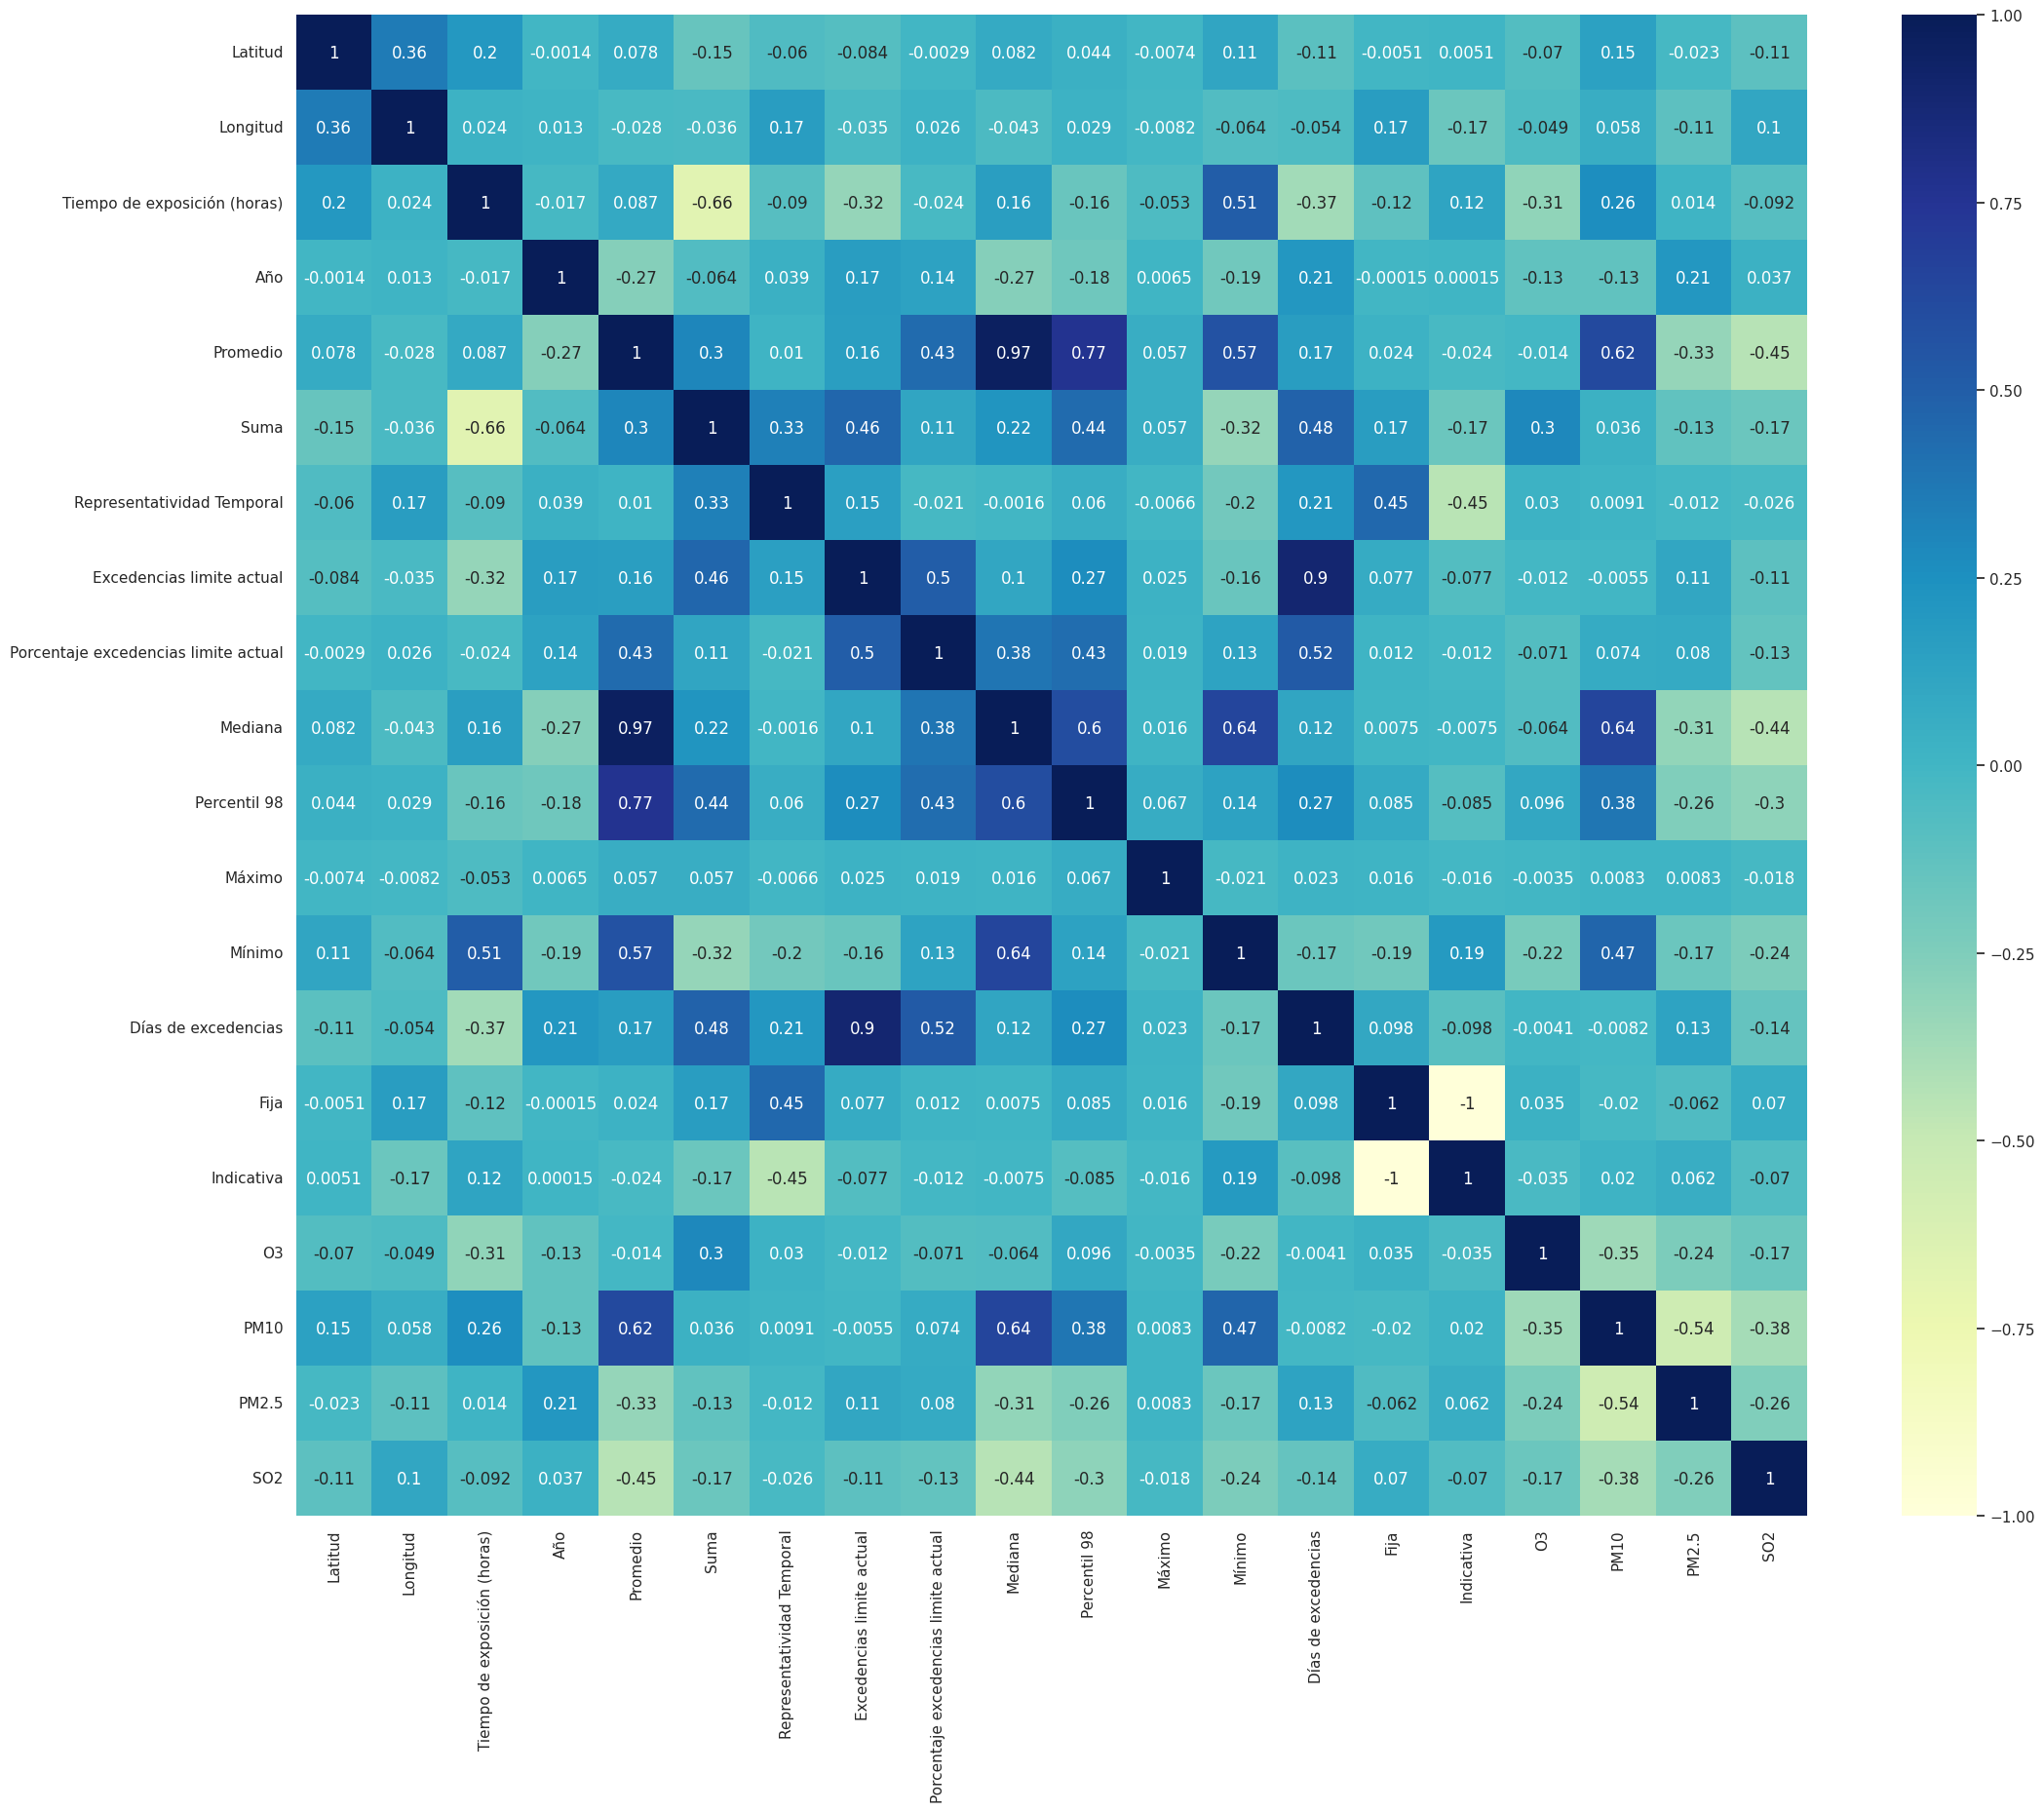

In [138]:
dn.corr()
sb.set(rc={'figure.figsize': (25,20)})
sb.heatmap(dn.corr(), annot=True, cmap="YlGnBu")
dn.corr()["Porcentaje excedencias limite actual"].sort_values(ascending=False)

# Regresion lineal


In [91]:
X =  dn.drop("Porcentaje excedencias limite actual", axis=1)
Y = dn["Porcentaje excedencias limite actual"]

In [92]:

from sklearn.model_selection import train_test_split
X_entrena, X_prueba, Y_entrena, Y_prueba = train_test_split(X, Y, test_size=.2)

In [93]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
modelo.fit(X_entrena, Y_entrena)

LinearRegression()

In [94]:
prediccion = modelo.predict(X_prueba)
print(prediccion)

[ 1.47029773  1.87550192 -2.20820498 ...  1.38816333  1.3372851
  4.43516074]


In [95]:
comparativa = {"Prediccion": prediccion, "Valor Real": Y_prueba}
pd.DataFrame(comparativa)

,Prediccion,Valor Real
6616,1.470298,0.00
3837,1.875502,0.00
3843,-2.208205,0.00
1446,5.740566,1.40
1298,-1.606721,0.00
...,...,...
4909,-3.855090,0.00
6099,2.045947,0.00
1162,1.388163,0.32
10246,1.337285,0.00


In [96]:
print(modelo.score(X_entrena, Y_entrena))
print(modelo.score(X_prueba, Y_prueba))

0.5629484685431572
0.6453138097168156


In [97]:
#Aplicamos a nuestro Modelo Error Cuadratico Medio
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_prueba, prediccion)
mse

16.471666040552776

In [98]:
import numpy as np
rmse = np.sqrt(mse)
rmse

4.058530034452471

In [99]:
# Evaluar el modelo con validación cruzada (métrica: error cuadratico)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, Y, cv=10, scoring='neg_mean_squared_error')
scores

array([-20.80134763,  -9.55021279, -16.18571395, -10.98901725,
       -10.59487422, -15.35078943, -38.17458701, -18.0240671 ,
       -35.23696827, -19.2727791 ])

In [100]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([4.56084944, 3.09034186, 4.02314727, 3.31496867, 3.25497684,
       3.91800835, 6.17855865, 4.24547607, 5.93607347, 4.39007735])

In [101]:
def mostrar_scores(scores):
  print("Puntajes de error MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de error MSE en cada fold: [4.56084944 3.09034186 4.02314727 3.31496867 3.25497684 3.91800835
 6.17855865 4.24547607 5.93607347 4.39007735]
Promedio de MSE: 4.291247796469143
Desviación estándar de MSE: 1.001612711489779


# Arbol de desición

In [102]:
from sklearn.tree import DecisionTreeRegressor
modelDecisionTree = DecisionTreeRegressor(random_state=42)
modelDecisionTree.fit(X_entrena, Y_entrena)

DecisionTreeRegressor(random_state=42)

In [103]:
# Evaluar el modelo con validación cruzada (métrica: error cuadratico)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelDecisionTree, X, Y, cv=10, scoring='neg_mean_squared_error')
scores

array([ -3.36180187,  -1.37135504,  -4.2488916 ,  -2.00048974,
        -0.93046772,  -7.11358097, -11.39268841, -16.80169757,
        -8.10345888,  -5.12779757])

In [104]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([1.83352171, 1.17104869, 2.06128397, 1.4143867 , 0.96460755,
       2.66712973, 3.37530568, 4.09898738, 2.84665749, 2.26446408])

In [105]:
def mostrar_scores(scores):
  print("Puntajes de error MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de error MSE en cada fold: [1.83352171 1.17104869 2.06128397 1.4143867  0.96460755 2.66712973
 3.37530568 4.09898738 2.84665749 2.26446408]
Promedio de MSE: 2.2697392979800872
Desviación estándar de MSE: 0.9452547044185325


# Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor
modeloRandomF = RandomForestRegressor(n_estimators=100, random_state=42)
modeloRandomF.fit(X_entrena, Y_entrena)

RandomForestRegressor(random_state=42)

In [107]:
# Evaluar el modelo con validación cruzada (métrica: error cuadratico)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modeloRandomF, X, Y, cv=10, scoring='neg_mean_squared_error')
scores

array([ -1.50429247,  -0.99809491,  -1.27833876,  -0.67598326,
        -0.73536214,  -3.89220064, -10.53260786,  -3.12281298,
        -7.06481715,  -2.18756116])

In [108]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([1.22649601, 0.999047  , 1.13063644, 0.82218201, 0.85753259,
       1.9728661 , 3.24539795, 1.76714826, 2.65797238, 1.47904062])

In [109]:
def mostrar_scores(scores):
  print("Puntajes de error MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de error MSE en cada fold: [1.22649601 0.999047   1.13063644 0.82218201 0.85753259 1.9728661
 3.24539795 1.76714826 2.65797238 1.47904062]
Promedio de MSE: 1.6158319360283742
Desviación estándar de MSE: 0.7670034471523659


In [110]:
modeloRandomF.score(X_prueba, Y_prueba)

0.9566614929455165

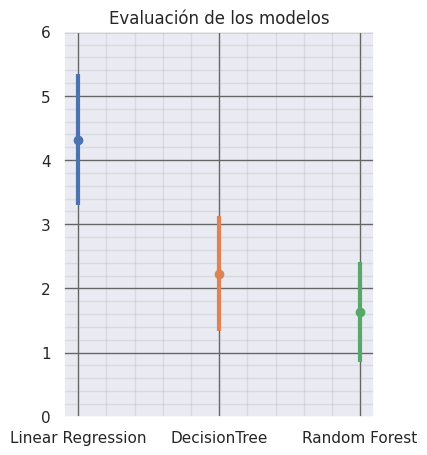

In [111]:
# Datos de evaluación
list_model = ['Linear Regression', 'DecisionTree', 'Random Forest']
list_mean = [4.31874664198695, 2.230012002631576, 1.6355857195287526]# promedio mse
list_sd = [1.016136966579744,0.8994053712052241 , 0.783582994971009] # desviacion mse

# Agregamos una gráfica para comparar visualmente los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 5))
for i in range(3):
    plt.errorbar(i, list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3)

plt.xticks([0, 1, 2], list_model)
plt.title("Evaluación de los modelos")
plt.ylim(0, 6.0)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

Error: Estás calculando una nueva media y desviación estándar usando solo X_prueba, lo que puede ser diferente de la media y desviación de X_entrena.

Esto rompe el principio de que los datos de prueba deben tratarse como si fueran datos nuevos y desconocidos para el modelo.

 Regla general
🔹 Para datos de entrenamiento (X_entrena):
✅ fit_transform(X_entrena)

🔹 Para datos de prueba (X_prueba):
✅ transform(X_prueba), usando la media y desviación de X_entrena

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_entrena_escalado = scaler.fit_transform(X_entrena)  # Aprende la media y desviación de X_entrena
X_prueba_escalado = scaler.transform(X_prueba)  # Usa esos valores para escalar X_prueba

print(X_entrena_escalado)  # Escalado con media y desviación de X_entrena
print(X_prueba_escalado)   # Transformado con la misma media y desviación


pd.DataFrame(X_entrena_escalado)

[[-0.14344815  1.49721322  0.88809498 ... -0.9016372   1.64398277
  -0.41792835]
 [-0.50274439 -1.08020987  0.88809498 ...  1.10909355 -0.60827888
  -0.41792835]
 [-1.17428435 -1.67755771 -1.23140739 ... -0.9016372   1.64398277
  -0.41792835]
 ...
 [-0.63833085  0.40348507  0.88809498 ...  1.10909355 -0.60827888
  -0.41792835]
 [ 0.08496187 -0.81423533 -0.58634145 ... -0.9016372  -0.60827888
  -0.41792835]
 [-0.57789284  0.4626066  -1.23140739 ... -0.9016372  -0.60827888
   2.39275463]]
[[-0.46763093  0.54167307  0.88809498 ... -0.9016372   1.64398277
  -0.41792835]
 [ 0.08340857 -0.82368955  0.88809498 ... -0.9016372   1.64398277
  -0.41792835]
 [-1.60493514 -1.7262064  -1.23140739 ...  1.10909355 -0.60827888
  -0.41792835]
 ...
 [ 0.04178793 -0.83310804  0.88809498 ... -0.9016372   1.64398277
  -0.41792835]
 [-0.20653782 -1.04152687  0.88809498 ... -0.9016372   1.64398277
  -0.41792835]
 [-0.59776914  0.35958668  0.88809498 ...  1.10909355 -0.60827888
  -0.41792835]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.143448,1.497213,0.888095,0.110732,-0.726969,-0.645760,-0.813692,-1.859252,-0.293608,-0.603650,-0.858150,-0.073568,0.401597,-0.395547,0.311987,-0.311987,-0.39136,-0.901637,1.643983,-0.417928
1,-0.502744,-1.080210,0.888095,0.715035,-0.523591,-0.642639,-0.809222,-1.733483,-0.293608,-0.584450,-0.354852,-0.054413,-0.513952,-0.395547,0.311987,-0.311987,-0.39136,1.109094,-0.608279,-0.417928
2,-1.174284,-1.677558,-1.231407,1.017186,-0.894457,-0.305680,0.098316,-0.915986,-0.227106,-0.846840,-0.640959,-0.035451,-0.709269,-0.075079,0.311987,-0.311987,-0.39136,-0.901637,1.643983,-0.417928
3,1.952820,1.190922,0.888095,0.110732,-0.798749,-0.633942,-0.785089,0.939105,-0.293608,-0.750844,-0.732848,-0.063926,-0.306427,-0.395547,0.311987,-0.311987,-0.39136,-0.901637,1.643983,-0.417928
4,0.070071,-0.874673,-1.231407,0.715035,0.864164,1.673744,0.977847,0.153050,1.692582,0.823492,0.800021,0.145556,-0.636025,2.877814,0.311987,-0.311987,-0.39136,1.109094,-0.608279,-0.417928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.028803,-0.659537,-1.231407,0.715035,-0.984182,-0.355016,0.079843,-0.947428,-0.116270,-1.000433,-0.586661,-0.044964,-0.684854,-0.166641,-3.205259,3.205259,-0.39136,-0.901637,1.643983,-0.417928
4280,0.164679,-0.617830,0.888095,-0.795721,-0.003183,-0.616848,-0.781811,1.222085,-0.293608,0.055523,-0.217019,-0.047682,0.523670,-0.395547,0.311987,-0.311987,-0.39136,1.109094,-0.608279,-0.417928
4281,-0.638331,0.403485,0.888095,-1.097872,2.676619,-0.427082,-0.720435,0.844778,-0.076369,2.833010,1.347175,0.017421,2.476841,0.726094,0.311987,-0.311987,-0.39136,1.109094,-0.608279,-0.417928
4282,0.084962,-0.814235,-0.586341,-1.702175,0.690694,-0.011584,-0.289012,-1.387619,0.065502,0.900289,0.612067,-0.017137,-0.477330,0.062265,0.311987,-0.311987,2.55519,-0.901637,-0.608279,-0.417928



# Regresion lineal NM M4

In [113]:
from sklearn.linear_model import LinearRegression

modeloRL=LinearRegression()
modeloRL.fit(X_entrena_escalado, Y_entrena)

LinearRegression()

In [114]:
# Evaluar el modelo con validación cruzada (métrica: error cuadratico)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modeloRL, X_entrena_escalado, Y_entrena, cv=10, scoring='neg_mean_squared_error')
scores

array([-27.77590463, -26.87650712, -15.80821824, -12.06606462,
        -8.51303944, -14.89640852,  -9.61204163, -19.80513437,
       -20.03079092, -19.73047945])

In [115]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([5.27028506, 5.1842557 , 3.97595501, 3.47362413, 2.91771134,
       3.85958657, 3.10032928, 4.45029599, 4.47557716, 4.44190043])

In [116]:
def mostrar_scores(scores):
  print("Puntajes de error MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de error MSE en cada fold: [5.27028506 5.1842557  3.97595501 3.47362413 2.91771134 3.85958657
 3.10032928 4.45029599 4.47557716 4.44190043]
Promedio de MSE: 4.11495206666406
Desviación estándar de MSE: 0.7606762665279779


# Arbol de desición NM M5

In [117]:
from sklearn.tree import DecisionTreeRegressor
modeloAR = DecisionTreeRegressor(random_state=42)
modeloAR.fit(X_entrena_escalado, Y_entrena)

DecisionTreeRegressor(random_state=42)

In [118]:
# Evaluar el modelo con validación cruzada (métrica: error cuadratico)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modeloAR, X_entrena_escalado, Y_entrena, cv=10, scoring='neg_mean_squared_error')
scores

array([ -1.78341865, -10.67989254,  -3.5633317 ,  -5.57264219,
        -1.95523645,  -1.99141098,  -2.08943084,  -3.58727103,
        -3.18162664,  -5.55033575])

In [119]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([1.33544698, 3.26801049, 1.88767892, 2.36064444, 1.3982977 ,
       1.41117362, 1.44548637, 1.89400925, 1.78371148, 2.35591506])

In [120]:
def mostrar_scores(scores):
  print("Puntajes de error MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de error MSE en cada fold: [1.33544698 3.26801049 1.88767892 2.36064444 1.3982977  1.41117362
 1.44548637 1.89400925 1.78371148 2.35591506]
Promedio de MSE: 1.9140374297618934
Desviación estándar de MSE: 0.5761253282518412


# Random Forest NM M6

In [121]:
from sklearn.ensemble import RandomForestRegressor
modeloRF = RandomForestRegressor(n_estimators=100, random_state=42)
modeloRF.fit(X_entrena_escalado, Y_entrena)

RandomForestRegressor(random_state=42)

In [122]:
# Evaluar el modelo con validación cruzada (métrica: error cuadratico)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modeloRF,X_entrena_escalado, Y_entrena, cv=10, scoring='neg_mean_squared_error')
scores

array([-2.62337687, -8.1718003 , -1.61307155, -1.00872809, -0.3475474 ,
       -1.96894013, -0.86627326, -1.91821647, -2.97002978, -3.29250407])

In [123]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([1.61968419, 2.85863609, 1.27006754, 1.00435456, 0.58953151,
       1.40318927, 0.93073802, 1.38499692, 1.72337743, 1.81452585])

In [124]:
def mostrar_scores(scores):
  print("Puntajes de error MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de error MSE en cada fold: [1.61968419 2.85863609 1.27006754 1.00435456 0.58953151 1.40318927
 0.93073802 1.38499692 1.72337743 1.81452585]
Promedio de MSE: 1.4599101389682985
Desviación estándar de MSE: 0.5888218560785068


In [125]:
modeloRF.score(X_prueba_escalado, Y_prueba)

0.957002766331047

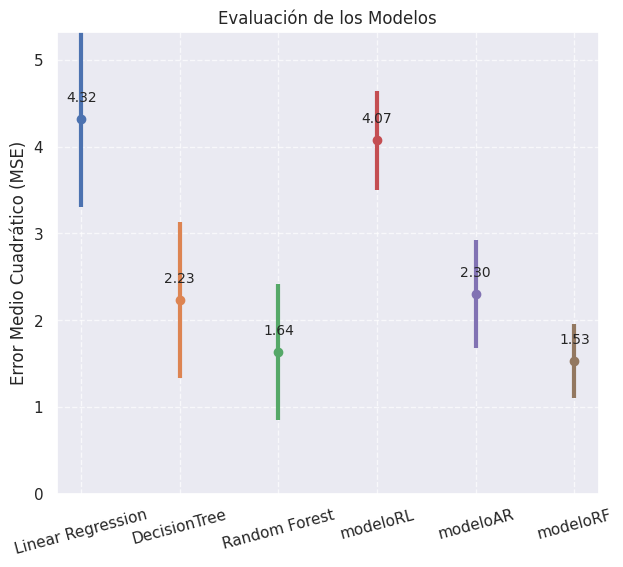

In [126]:
import matplotlib.pyplot as plt

# Datos de evaluación
list_model = ['Linear Regression', 'DecisionTree', 'Random Forest', 'modeloRL', 'modeloAR', 'modeloRF']
list_mean = [4.31874664198695, 2.230012002631576, 1.6355857195287526, 4.071436786771374, 2.301606609844133, 1.5289282231224315] # Promedio MSE
list_sd = [1.016136966579744, 0.8994053712052241, 0.783582994971009, 0.5729228831532689, 0.6179252576640931, 0.4269868458244969] # Desviación MSE

# Crear la figura ANTES de graficar
plt.figure(figsize=(7, 6))

# Graficar cada modelo con su error
for i in range(len(list_model)):
    plt.errorbar(i, list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3, label=list_model[i])
    plt.text(i, list_mean[i] + 0.2, f'{list_mean[i]:.2f}', ha='center', fontsize=10)  # Ajuste menor en texto

# Configuración de la gráfica
plt.xticks(range(len(list_model)), list_model, rotation=15)  # Rotar etiquetas para mejor visibilidad
plt.title("Evaluación de los Modelos")
plt.ylabel("Error Medio Cuadrático (MSE)")
plt.ylim(0, max(list_mean) + 1)  # Ajuste automático del límite superior
plt.grid(visible=True, which='major', linestyle='--', alpha=0.7)
plt.show()


In [127]:
modeloRL.score(X_prueba_escalado, Y_prueba)

0.6453138097167634

In [128]:
modeloAR.score(X_prueba_escalado, Y_prueba)

0.9066137398926962

In [129]:
modeloRF.score(X_prueba_escalado, Y_prueba)

0.957002766331047

In [130]:
# RandomForest

#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


#forest_reg = RandomForestRegressor()

# Definimos los posibles parámetros
n_estimators = [3, 10, 30, 50, 80, 100]
min_samples_split = [2, 4, 6, 8]
max_depth = [2, 4, 6, 8, 10]

params = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'max_depth': max_depth
}


#Aplicamos el método de ajuste

grid_search = GridSearchCV(estimator=modeloRF, param_grid=params, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_entrena_escalado, Y_entrena)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30, 50, 80, 100]},
             scoring='neg_mean_squared_error')

In [131]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [132]:
# RandomForest

#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


#forest_reg = RandomForestRegressor()

# Definimos los posibles parámetros
n_estimators = [100]
min_samples_split = [2]
max_depth = [10]

params = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'max_depth': max_depth
}


#Aplicamos el método de ajuste

grid_search = GridSearchCV(estimator=modeloRF, param_grid=params, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_entrena_escalado, Y_entrena)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10], 'min_samples_split': [2],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error')